# Data Analysis for Business Insights
### Customer Sign-Up Behaviour & Data Quality Audit

## 1. Load and clean the data

### 1.1. Load the datasets

In [ ]:
# Load the datasets into Pandas DataFrames
import pandas as pd

df_signups = pd.read_csv('customer_signups.csv')
df_tickets = pd.read_csv('support_tickets.csv')

*View the datasets*

In [ ]:
# View the head of the customer_signups dataset
df_signups.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [ ]:
# View the head of the support_tickets dataset
df_tickets.head()

,ticket_id,customer_id,ticket_date,issue_type,resolved
0,TKT0000-1,CUST00203,2024-08-17,Billing,Yes
1,TKT0000-2,CUST00203,2024-07-22,Technical Error,Yes
2,TKT0000-3,CUST00203,2024-07-22,Other,Yes
3,TKT0001-1,CUST00266,2024-09-26,Account Setup,Yes
4,TKT0001-2,CUST00266,2024-10-09,Technical Error,No


*Identify missing values, data types, and column structure*

In [ ]:
# Function to summarise dataset structure
def dataset_summary(df):
    return pd.DataFrame({
        "DataType": df.dtypes,
        "Count of Missing Values": df.isnull().sum(),
        "% of Missing Values": (df.isnull().sum() / len(df)) * 100,
        "Unique Values": df.nunique()
    })

# View the summaries
print("customer_signups dataset structure:\n", dataset_summary(df_signups))
print("\nsupport_tickets dataset structure:\n", dataset_summary(df_tickets))

customer_signups dataset structure:
                  DataType  Count of Missing Values  % of Missing Values  \
customer_id        object                        2             0.666667   
name               object                        9             3.000000   
email              object                       34            11.333333   
signup_date        object                        2             0.666667   
source             object                        9             3.000000   
region             object                       30            10.000000   
plan_selected      object                        8             2.666667   
marketing_opt_in   object                       10             3.333333   
age                object                       12             4.000000   
gender             object                        8             2.666667   

                  Unique Values  
customer_id                 298  
name                        291  
email                       265  
s

### 1.2. Clean the data

*Convert date columns type to datetime*

In [ ]:
# Convert date columns type from object to datetime
df_signups['signup_date'] = pd.to_datetime(
    df_signups['signup_date'],
    format="%d-%m-%y",
    errors='coerce'
)

# Convert the ticket_date's column type from object to datetime
df_tickets['ticket_date'] = pd.to_datetime(
    df_tickets['ticket_date'],
    errors='coerce'
)

*Standardise text values*

* Visualise the unique values



In [ ]:
# Standardise inconsistent text values

# Check the unique values first
print("Check the unique values in the customer_signups dataset")
print("\nUnique values in the source column: ", df_signups['source'].unique())
print("Unique values in the region column: ", df_signups['region'].unique())
print("Unique values in the plan_selected column: ", df_signups['plan_selected'].unique())
print("Unique values in the marketing_opt_in column: ", df_signups['marketing_opt_in'].unique())
print("Unique values in the gender column: ", df_signups['age'].unique())
print("Unique values in the gender column: ", df_signups['gender'].unique())

print("\nCheck the unique values in the support_tickets dataset")
print("\nUnique values in the issue_type column: ", df_tickets['issue_type'].unique())
print("Unique values in the resolved column: ", df_tickets['resolved'].unique())

Check the unique values in the customer_signups dataset

Unique values in the source column:  ['Instagram' 'LinkedIn' 'Google' 'YouTube' 'Facebook' 'Referral' nan '??']
Unique values in the region column:  [nan 'West' 'North' 'South' 'Central' 'East']
Unique values in the plan_selected column:  ['basic' 'PREMIUM' 'Pro' 'Premium' 'UnknownPlan' 'PRO' 'Basic' nan 'prem']
Unique values in the marketing_opt_in column:  ['No' 'Yes' nan 'Nil']
Unique values in the gender column:  ['34' '29' '40' '25' '60' '47' '53' '21' nan 'unknown' 'thirty' '206']
Unique values in the gender column:  ['Female' 'Male' 'Non-Binary' 'Other' 'male' 'FEMALE' nan '123']

Check the unique values in the support_tickets dataset

Unique values in the issue_type column:  ['Billing' 'Technical Error' 'Other' 'Account Setup' 'Login Issue']
Unique values in the resolved column:  ['Yes' 'No']


* Convert the misspelled unique values to a singular format and flag unrecognizable values

In [ ]:
# Change the different types to a singular format
import numpy as np

df_signups['source'] = df_signups['source'].replace({
    '??': np.nan
})

df_signups['plan_selected'] = df_signups['plan_selected'].replace({
    'basic': 'Basic',
    'PREMIUM': 'Premium',
    'UnknownPlan': np.nan,
    'PRO': 'Pro',
    'prem': 'Premium'
})

df_signups['marketing_opt_in'] = df_signups['marketing_opt_in'].replace({
    'Nil': np.nan
})

df_signups['gender'] = df_signups['gender'].replace({
    'male': 'Male',
    'FEMALE': 'Female',
    '123': np.nan,
})

df_signups['age'] = df_signups['age'].replace({
    'thirty': '30',
    'unknown': np.nan,
    '206': np.nan,
})

# Check for unique values again to make sure the replacement was correct
print(df_signups['source'].unique())
print(df_signups['plan_selected'].unique())
print(df_signups['marketing_opt_in'].unique())
print(df_signups['gender'].unique())

['Instagram' 'LinkedIn' 'Google' 'YouTube' 'Facebook' 'Referral' nan]
['Basic' 'Premium' 'Pro' nan]
['No' 'Yes' nan]
['Female' 'Male' 'Non-Binary' 'Other' nan]


*Handle duplicate rows*

* Check for any duplicate rows based on id

In [ ]:
# Check for any duplicate rows based on id
print("Duplicate rows in customer_signups dataset:")
print(df_signups[df_signups.duplicated(subset='customer_id')])

print("\nDuplicate rows in support_tickets dataset:")
print(df_tickets[df_tickets.duplicated(subset='ticket_id')])

Duplicate rows in customer_signups dataset:
    customer_id             name                    email signup_date  \
287         NaN  Antonio Hammond  antonio87@inboxmail.net  2024-10-14   

        source region plan_selected marketing_opt_in age  gender  
287  Instagram   West       Premium              Yes  25  Female  

Duplicate rows in support_tickets dataset:
Empty DataFrame
Columns: [ticket_id, customer_id, ticket_date, issue_type, resolved]
Index: []


* Remove duplicate rows

In [ ]:
# Remove duplicate rows
df_signups = df_signups.drop_duplicates(subset='customer_id', keep=False)

print(df_signups[df_signups.duplicated(subset='customer_id')])

Empty DataFrame
Columns: [customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender]
Index: []


*Handle missing values*

* Drop the rows with missing values for identifiers and columns that are crucial for analysis: customer_id, email, name, signup_date

In [ ]:
df_signups.dropna(subset=["customer_id", "email", "name", "signup_date"], inplace=True)

* Impute with mode values for missing values in categorical columns: source, region, gender, plan_selected, marketing_opt_in

In [ ]:
categorical_cols = ["source", "region", "gender", "plan_selected", "marketing_opt_in"]

for col in categorical_cols:
    mode_vals = df_signups[col].mode()
    if not mode_vals.empty: # only fill if mode exists
        mode_val = mode_vals[0]
        df_signups.fillna({col: mode_val}, inplace=True)

* Convert the age column's type to numeric and fill with the median age

In [ ]:
df_signups['age'] = pd.to_numeric(df_signups['age'], errors='coerce')

median_age = df_signups['age'].median()
df_signups['age'] = df_signups['age'].fillna(median_age)

## 2. Summary Outputs

Using Pandas Aggregations

*Sign-ups per week, grouped by signup_date*

Sign-ups by week:  signup_week
2024-01-01/2024-01-07    5
2024-01-08/2024-01-14    6
2024-01-15/2024-01-21    6
2024-01-22/2024-01-28    6
2024-01-29/2024-02-04    6
2024-02-05/2024-02-11    6
2024-02-12/2024-02-18    6
2024-02-19/2024-02-25    6
2024-02-26/2024-03-03    7
2024-03-04/2024-03-10    6
2024-03-11/2024-03-17    6
2024-03-18/2024-03-24    5
2024-03-25/2024-03-31    5
2024-04-01/2024-04-07    7
2024-04-08/2024-04-14    5
2024-04-15/2024-04-21    6
2024-04-22/2024-04-28    6
2024-04-29/2024-05-05    6
2024-05-06/2024-05-12    6
2024-05-13/2024-05-19    5
2024-05-20/2024-05-26    6
2024-05-27/2024-06-02    6
2024-06-03/2024-06-09    6
2024-06-10/2024-06-16    4
2024-06-17/2024-06-23    6
2024-06-24/2024-06-30    6
2024-07-01/2024-07-07    7
2024-07-08/2024-07-14    6
2024-07-15/2024-07-21    5
2024-07-22/2024-07-28    6
2024-07-29/2024-08-04    6
2024-08-05/2024-08-11    6
2024-08-12/2024-08-18    5
2024-08-19/2024-08-25    6
2024-08-26/2024-09-01    6
2024-09-02/2024-09-08   

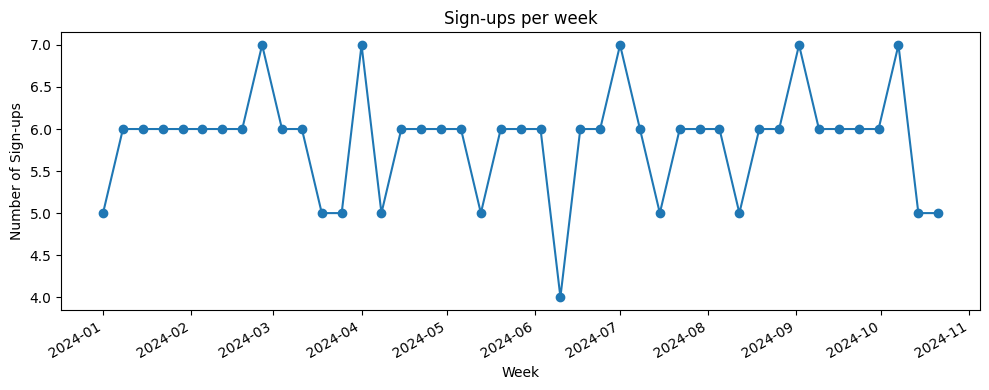

In [ ]:
import matplotlib.pyplot as plt

# Sign-ups per week (grouped by signup_date)
df_signups['signup_week'] = df_signups['signup_date'].dt.to_period('W').astype(str)
signups_per_week = df_signups['signup_week'].value_counts().sort_index()

print("Sign-ups by week: ", signups_per_week)
print(" ")

# Visualise in a line chart
weekly = (
    df_signups['signup_date']
    .dt.to_period('W')  # week periods
    .value_counts()
    .sort_index()
)
x = weekly.index.to_timestamp() # timestamps

plt.figure(figsize=(10, 4))
plt.plot(x, weekly.values, marker='o')
plt.title('Sign-ups per week')
plt.xlabel('Week')
plt.ylabel('Number of Sign-ups')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

*Sign-ups by source, region and plan_selected*


Sign-ups by source
YouTube      63
Google       42
Referral     42
Instagram    39
Facebook     36
LinkedIn     30
Name: count, dtype: int64
 


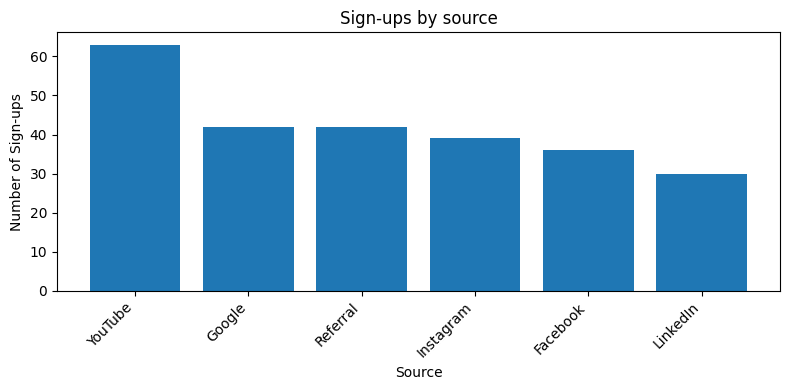

 

Sign-ups by region
North      79
East       51
South      51
West       38
Central    33
Name: count, dtype: int64
 


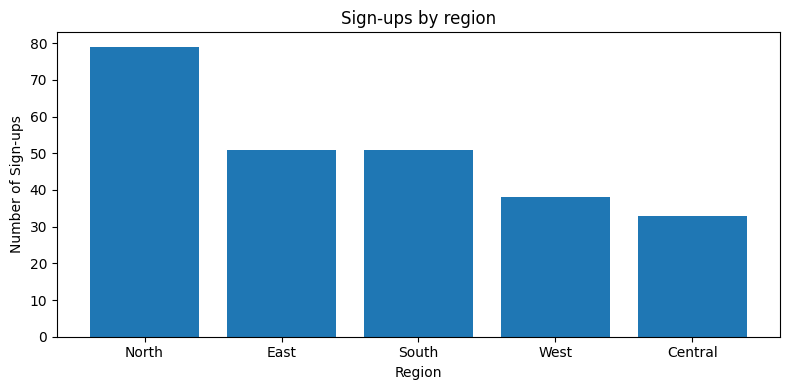

 

Sign-ups by plan_selected
Premium    93
Pro        80
Basic      79
Name: count, dtype: int64
 


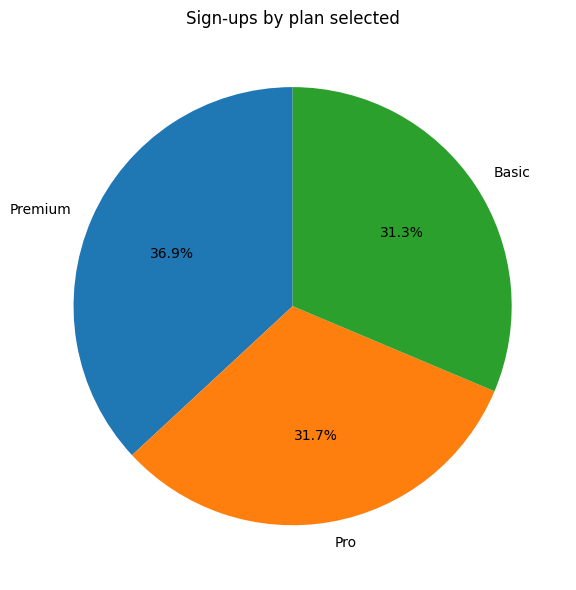

In [ ]:
# Sign-ups by source, region, and plan_selected

print("\nSign-ups by", df_signups['source'].value_counts())
print(" ")

# Visualise sign-ups by source in a bar chart
source_counts = df_signups['source'].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(source_counts.index.astype(str), source_counts.values)
plt.title('Sign-ups by source')
plt.xlabel('Source')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(" ")

print("\nSign-ups by", df_signups['region'].value_counts())
print(" ")

# Visualise sign-ups by region in a bar chart
region_counts = df_signups['region'].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(region_counts.index.astype(str), region_counts.values)
plt.title('Sign-ups by region')
plt.xlabel('Region')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(" ")


print("\nSign-ups by", df_signups['plan_selected'].value_counts())
print(" ")

# Visualise sign-ups by plan_selected in a pie chart
plan_counts = df_signups['plan_selected'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(plan_counts.values, labels=plan_counts.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Sign-ups by plan selected')
plt.tight_layout()
plt.show()

*Marketing opt-in counts by gender*


Marketing opt-in counts by gender:
 marketing_opt_in  No  Yes
gender                   
Female            49   42
Male              47   30
Non-Binary        19   16
Other             28   21
 


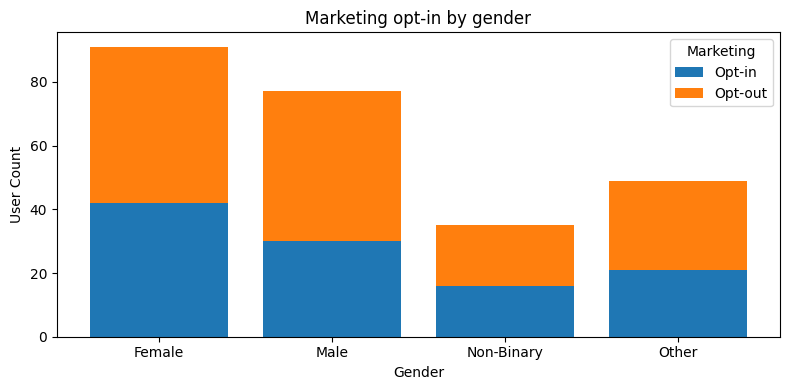

In [ ]:
# Marketing opt-in counts by gender
for col in ['gender', 'marketing_opt_in']:
    if col not in df_signups.columns:
        df_signups[col] = pd.NA

marketing_opt_in_by_gender = (
    df_signups.groupby(['gender', 'marketing_opt_in']).size().unstack(fill_value=0)
    if len(df_signups) else pd.DataFrame()
)

print("\nMarketing opt-in counts by gender:\n", marketing_opt_in_by_gender if not marketing_opt_in_by_gender.empty else "No data.")
print(" ")

# Visualise in a stacked bar chart
def normalize_optin(x):
    s = str(x).strip().lower()
    if s in ['yes', 'y', 'true', '1']:
        return 'Opt-in'
    if s in ['no', 'n', 'false', '0']:
        return 'Opt-out'
    return 'Unknown'

df_plot = df_signups.copy()
df_plot['marketing_opt_in_norm'] = df_plot['marketing_opt_in'].apply(normalize_optin)

ct = pd.crosstab(df_plot['gender'], df_plot['marketing_opt_in_norm'])
ct = ct.reindex(columns=[c for c in ['Opt-in', 'Opt-out', 'Unknown'] if c in ct.columns])  # column order

plt.figure(figsize=(8, 4))
bottom = np.zeros(len(ct))
for col in ct.columns:
    plt.bar(ct.index.astype(str), ct[col].values, bottom=bottom, label=col)
    bottom += ct[col].values
plt.title('Marketing opt-in by gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Marketing')
plt.tight_layout()
plt.show()

*Age summary*


Age Summary:
Min age: 21.0
Max age: 60.0
Mean age: 35.92857142857143
Median age: 34.0
 


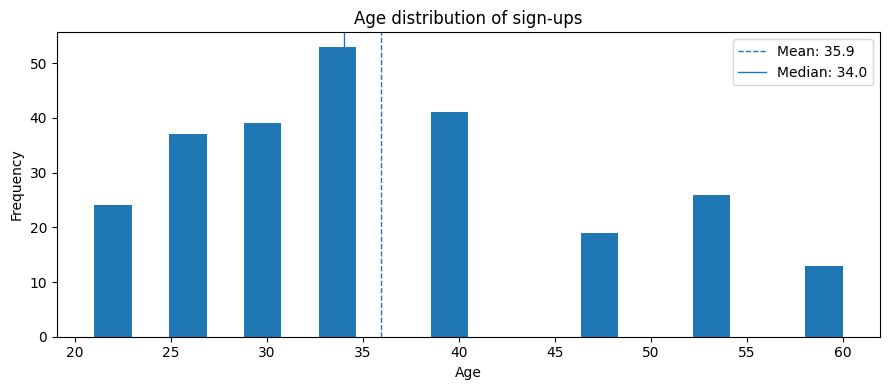

In [ ]:
# Age summary: min, max, mean, median
df_signups['age'] = pd.to_numeric(df_signups['age'], errors='coerce')

print("\nAge Summary:")
print("Min age:", df_signups['age'].min())
print("Max age:", df_signups['age'].max())
print("Mean age:", df_signups['age'].mean())
print("Median age:", df_signups['age'].median())
print(" ")

# Visualise in a histogram
ages = df_signups['age'].dropna()
age_mean = ages.mean()
age_median = ages.median()

plt.figure(figsize=(9, 4))
plt.hist(ages, bins=20)
plt.title('Age distribution of sign-ups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(age_mean, linestyle='--', linewidth=1, label=f'Mean: {age_mean:.1f}')
plt.axvline(age_median, linestyle='-', linewidth=1, label=f'Median: {age_median:.1f}')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Support activity

*Join support_tickets.csv to customer_signups.csv on customer_id*

In [ ]:
df_merged = pd.merge(
    df_signups,
    df_tickets,
    on="customer_id",
    how="left"
)

print(df_merged.head())

  customer_id             name                 email signup_date    source  \
0   CUST00001   Nicole Stewart   nicole1@example.com  2024-01-02  LinkedIn   
1   CUST00002     Rachel Allen   rachel2@example.com  2024-01-03    Google   
2   CUST00003  Zachary Sanchez  zachary3@mailhub.org  2024-01-04   YouTube   
3   CUST00005    John Gonzales     john5@mailhub.org  2024-01-06  Facebook   
4   CUST00006    Crystal Mason  crystal6@mailhub.org  2024-01-07   YouTube   

  region plan_selected marketing_opt_in   age      gender  \
0   West         Basic              Yes  29.0        Male   
1  North       Premium              Yes  34.0  Non-Binary   
2  North           Pro               No  40.0        Male   
3  South       Premium               No  34.0       Other   
4  North       Premium              Yes  40.0        Male   

             signup_week  ticket_id ticket_date issue_type resolved  
0  2024-01-01/2024-01-07        NaN         NaT        NaN      NaN  
1  2024-01-01/2024-01-07

*Count how many customers contacted support within 2 weeks of sign-up*

In [ ]:
# Calculate the time between signup date and ticket date
df_merged['days_between'] = (df_merged['ticket_date'] - df_merged['signup_date']).dt.days

# Filter only those who contacted support within 14 days (2 weeks of sign-up)
df_within_2weeks = df_merged[df_merged['days_between'] <= 14]

# Count unique customers
num_customers_within_2weeks = df_within_2weeks['customer_id'].nunique()

print(f"Customers who contacted support within 2 weeks: {num_customers_within_2weeks}")

Customers who contacted support within 2 weeks: 34


*Summarise support activity by plan and region*

Support activity by plan and region:
    plan_selected   region  ticket_count
0          Basic  Central             2
1          Basic     East            10
2          Basic    North             5
3          Basic    South            11
4          Basic     West             7
5        Premium  Central             3
6        Premium    North            11
7        Premium    South             2
8        Premium     West             8
9            Pro  Central             8
10           Pro     East            14
11           Pro    North            14
12           Pro    South             3
13           Pro     West             4
 


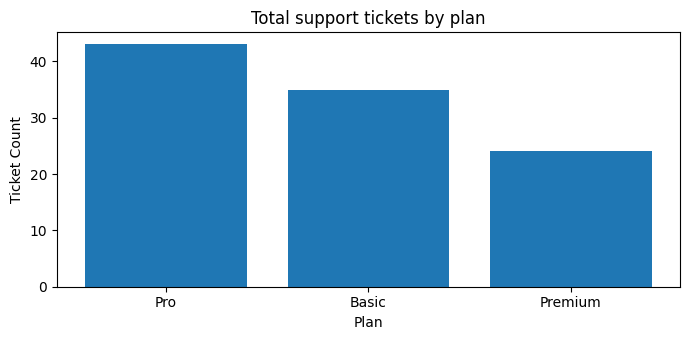

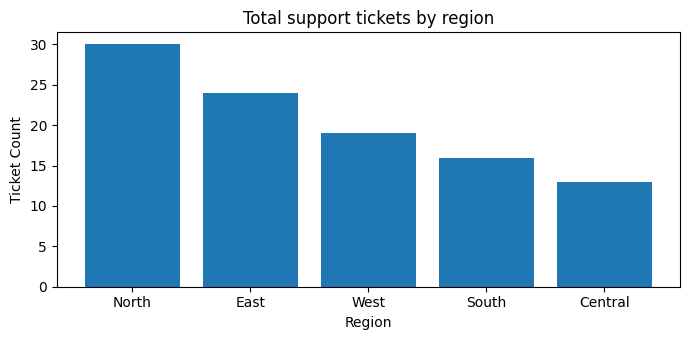

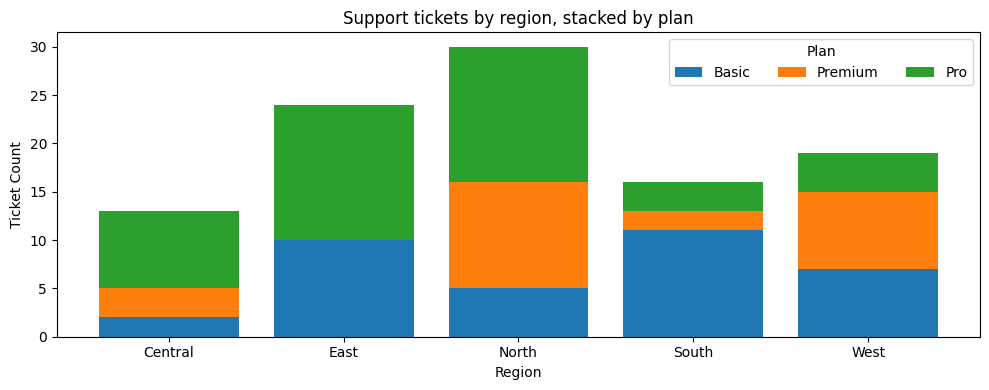

In [ ]:
# Merge to bring plan and region into tickets data
df_tickets_merged = pd.merge(
    df_tickets,
    df_signups[["customer_id", "plan_selected", "region"]],
    on="customer_id",
    how="left"
)

# Group by plan and region, count tickets
support_summary = (
    df_tickets_merged
    .groupby(["plan_selected", "region"])
    .size()
    .reset_index(name="ticket_count")
)

print("Support activity by plan and region:\n", support_summary)
print(" ")

# Visualisation in bar charts
pivot_counts = support_summary.pivot(index='plan_selected', columns='region', values='ticket_count').fillna(0)
plans = pivot_counts.index.tolist()
regions = pivot_counts.columns.tolist()

# total tickets per plan
plan_totals = pivot_counts.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(7, 3.5))
plt.bar(plan_totals.index.astype(str), plan_totals.values)
plt.title('Total support tickets by plan')
plt.xlabel('Plan')
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()
print(" ")

# total tickets per region
region_totals = pivot_counts.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(7, 3.5))
plt.bar(region_totals.index.astype(str), region_totals.values)
plt.title('Total support tickets by region')
plt.xlabel('Region')
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()
print(" ")

# support tickets by region stacked by plan
plt.figure(figsize=(10, 4))
bottom = np.zeros(len(regions))
for plan in plans:
    counts = pivot_counts.loc[plan, regions].values
    plt.bar(regions, counts, bottom=bottom, label=plan)
    bottom += counts

plt.title('Support tickets by region, stacked by plan')
plt.xlabel('Region')
plt.ylabel('Ticket Count')
plt.legend(title='Plan', ncol=min(4, len(plans)))
plt.tight_layout()
plt.show()


## 4. Business Questions

*1. Which acquisition source brought in the most users last month?*

In [ ]:
last_month = df_signups['signup_date'].max().to_period('M')
signups_last_month = df_signups[df_signups['signup_date'].dt.to_period('M') == last_month]
most_common_source_last_month = signups_last_month['source'].value_counts().idxmax()
most_common_source_last_month_count = signups_last_month['source'].value_counts().max()

print("The acquisition source that brought the most users last month:", most_common_source_last_month)
print("The number of user brought:", most_common_source_last_month_count)

The acquisition source that brought the most users last month: Google
The number of user brought: 7


*2. Which region shows signs of missing or incomplete data?*

The values distribution for each region:
region
North      79
East       51
South      51
West       38
Central    33
Name: count, dtype: int64
 


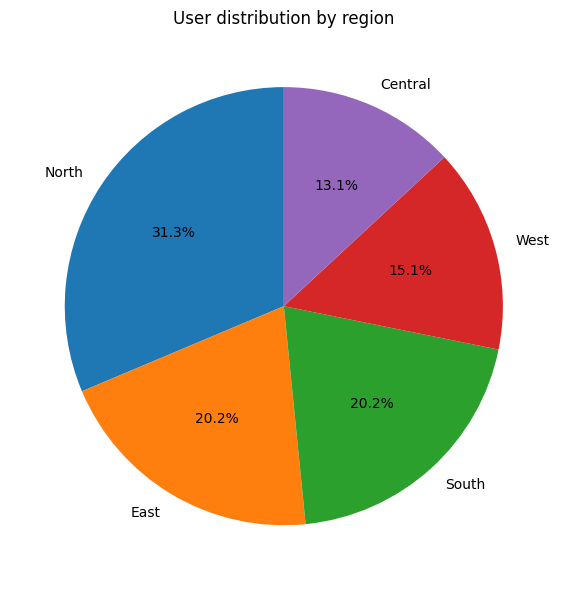

In [ ]:
region_value_counts = df_signups['region'].value_counts(dropna=False)

print("The values distribution for each region:")
print(region_value_counts)
print(" ")

# Visualise in a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    region_value_counts.values,
    labels=region_value_counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title('User distribution by region')
plt.tight_layout()
plt.show()

*3. Are older users more or less likely to opt in to marketing?*

In [ ]:
# Create age groups
df_signups['age_group'] = pd.cut(
    df_signups['age'],
    bins=[0,25,35,50,100],
    labels=['<25','25-35','35-50','50+']
)

# Convert Yes/No values to numeric
df_signups['marketing_opt_in'] = df_signups['marketing_opt_in'].map({'Yes': 1, 'No': 0})

# Group and calculate mean
optin_by_age_group = df_signups.groupby('age_group', observed=True)['marketing_opt_in'].mean()
optin_by_age_group_percent = (optin_by_age_group * 100).round(2)

print(optin_by_age_group_percent)


age_group
<25      40.98
25-35    43.48
35-50    46.67
50+      41.03
Name: marketing_opt_in, dtype: float64


In [ ]:
df_signups['marketing_opt_in_flag'] = df_signups['marketing_opt_in'].apply(lambda x: 1 if str(x).lower() in ['yes', 'y', '1', 'true'] else 0)
age_marketing_corr = df_signups[['age', 'marketing_opt_in_flag']].corr().iloc[0,1]

print("The correlation index between age and marketing opt-ins:", age_marketing_corr)

The correlation index between age and marketing opt-ins: 0.004986191903326552


*4. Which plan is most commonly selected, and by which age group?*

   plan_selected age_group  count
0          Basic       <25     25
1          Basic     25-35     28
2          Basic     35-50     13
3          Basic       50+     13
4        Premium       <25     17
5        Premium     25-35     33
6        Premium     35-50     31
7        Premium       50+     12
8            Pro       <25     19
9            Pro     25-35     31
10           Pro     35-50     16
11           Pro       50+     14
The most common selected plan is: Premium
 


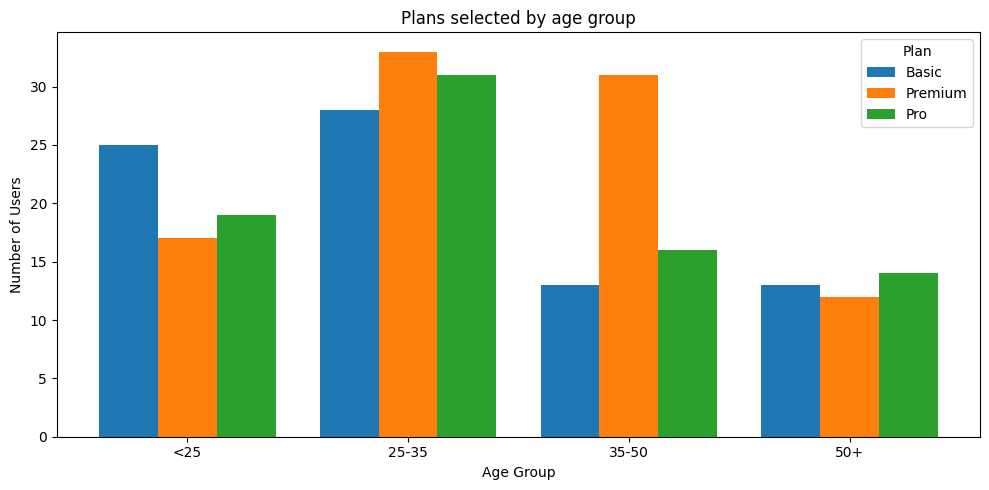

In [ ]:
plan_counts = df_signups['plan_selected'].value_counts()
most_common_plan = plan_counts.idxmax()
df_signups['age_group'] = pd.cut(df_signups['age'], bins=[0,25,35,50,100], labels=['<25','25-35','35-50','50+'])
plan_by_age = df_signups.groupby(['plan_selected', 'age_group'], observed=True).size().reset_index(name="count")

print(plan_by_age)
print("The most common selected plan is:", most_common_plan)
print(" ")

# Visualise
pivot_plan_age = plan_by_age.pivot(index='age_group', columns='plan_selected', values='count').fillna(0)
age_groups = pivot_plan_age.index.astype(str)
plans = pivot_plan_age.columns

x = np.arange(len(age_groups))
width = 0.8 / len(plans)

plt.figure(figsize=(10, 5))
for idx, plan in enumerate(plans):
    plt.bar(x + idx*width, pivot_plan_age[plan].values, width=width, label=plan)

plt.title('Plans selected by age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(x + (len(plans)-1)*width/2, age_groups)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

*5. Which plan's users are most likely to contact support?*

  plan_selected  contacted_support  contacted_support_pct
0         Basic            0.21519              21.518987
1       Premium            0.11828              11.827957
2           Pro            0.27500              27.500000
 


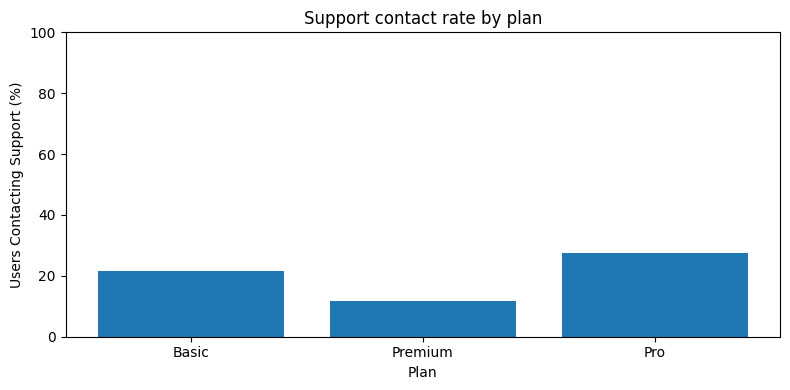

In [ ]:
first_ticket = df_tickets.groupby("customer_id")["ticket_date"].min().reset_index()
first_ticket.rename(columns={"ticket_date": "first_ticket_date"}, inplace=True)
df_merged = pd.merge(df_signups, first_ticket, on="customer_id", how="left")
df_merged["contacted_support"] = df_merged["first_ticket_date"].notna().astype(int)
support_rate_by_plan = df_merged.groupby("plan_selected")["contacted_support"].mean().reset_index()
support_rate_by_plan['contacted_support_pct'] = support_rate_by_plan['contacted_support'] * 100

print(support_rate_by_plan)
print(" ")

# Visualise in a bar chart with percentages
plt.figure(figsize=(8, 4))
plt.bar(
    support_rate_by_plan['plan_selected'].astype(str),
    support_rate_by_plan['contacted_support_pct']
)
plt.title('Support contact rate by plan')
plt.xlabel('Plan')
plt.ylabel('Users Contacting Support (%)')
plt.ylim(0, 100)  # force scale 0–100%
plt.tight_layout()
plt.show()